In [ ]:
MODEL = 'nli_clinical_bert'
# DATASET = 'control_test'
DATASET = 'exame_OSCE_cefaleia'

# TSV_PATH = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL + '/'
TSV_PATH = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL + '/'
IMG_PATH = 'img/' + DATASET + '_' + MODEL + '/'

import os.path

if not os.path.exists(TSV_PATH):
    os.mkdir(TSV_PATH)
    
if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [2]:
import pandas as pd

embeddings_df = pd.read_csv(TSV_PATH + 'word_embeddings.tsv', sep='\t',header=None)
# embeddings_df = pd.read_csv('../sentence_embedding/tsv_files/stsb-roberta-large/exame-OSCE/cefaleia/word_embeddings.tsv', sep='\t',header=None)

sentences_df = pd.read_csv(TSV_PATH + 'labels.tsv', sep='\t',header=None)
# sentences_df = pd.read_csv('../sentence_embedding/tsv_files/paraphrase-distilroberta-base-v1/exame-OSCE/cefaleia/labels.tsv', sep='\t',header=None)

print(sentences_df)
embeddings_numpy = embeddings_df.to_numpy()
sentences_numpy = sentences_df.to_numpy()

X_embeddings = embeddings_numpy[:, :-1]

provas = []
for i in range(len(X_embeddings)):
    provas.append(i)
embeddings_df

                                                     0
0    location, onset, characteristics, radiation, a...
1    When investigating a headache, the onset, freq...
2    locate pain (laterality, region); assessment o...
3    Pain characteristics (location; intensity; dur...
4    clinical history- know in what context it aris...
..                                                 ...
108                       Headache with or without aur
109  The headache diagnostic approach should underg...
110  Non-pharmacological therapy: biofeedback with ...
111  Characterize the pain in terms of location, in...
112  Clinical history: onset of symptoms / characte...

[113 rows x 1 columns]


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,0.447343,-0.343146,0.218411,1.147695,-0.145658,-0.131758,0.027484,0.072224,0.346059,-0.631714,...,1.134069,-0.353833,-0.149659,0.197085,0.160925,0.006032,-0.057427,-0.727802,-0.348505,NaN
1,0.378171,-0.790414,0.458711,0.297382,0.422155,-0.668680,1.006022,-0.096534,0.577392,-0.277640,...,0.357554,1.151550,-0.273822,0.005145,-0.298826,0.017354,-0.743434,-0.445170,-0.622237,NaN
2,0.579448,-0.333298,-0.042743,0.795108,-0.302029,-0.257801,-0.305139,-0.119832,0.152242,-0.188193,...,0.337529,-0.288469,0.009001,0.073839,0.144560,0.527198,0.267433,-0.733828,-0.574577,NaN
3,0.231017,-0.255632,-0.054228,0.180291,-0.460682,0.132552,0.219686,0.302740,0.823282,-0.196006,...,0.850721,0.230991,-0.441917,0.568093,0.511808,0.407874,0.039436,-0.309849,-0.728362,NaN
4,0.368132,-0.918188,0.673563,0.621912,0.415882,0.233591,0.285549,0.300509,0.017700,-0.436811,...,0.527945,0.323026,0.019721,-0.436250,0.104770,0.337995,-0.004844,0.048812,-0.076286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.682630,0.297002,0.663002,0.116524,-0.058974,0.402705,-0.369008,-0.173253,0.158965,0.132995,...,0.609517,0.340716,-0.120515,0.426392,0.239195,-0.653668,-0.421530,0.591808,-0.742801,NaN
109,0.070863,-0.752483,0.705631,0.110093,0.498947,0.184266,-0.585584,0.133398,0.539396,-0.255829,...,0.081404,0.182877,-0.220331,0.307684,-0.201624,0.237371,0.147980,-0.200368,-0.794842,NaN
110,0.141474,0.276175,0.011989,0.403777,-1.124887,0.104293,-0.556553,0.086737,0.901901,0.340229,...,0.265871,0.119769,-0.010249,0.282935,-0.207620,0.484290,0.060910,0.590122,-0.730808,NaN
111,0.268505,0.070493,0.453567,0.070426,-0.597197,0.586869,0.582872,-0.034143,0.090447,0.371378,...,1.057664,0.691779,-0.217061,-0.175912,0.253346,0.615163,1.004366,-0.623879,-0.094788,NaN


In [3]:
from matplotlib import pyplot as plt
import numpy as np

def plot_clustering(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(provas[i])+'.', color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold'})
        plt.scatter(X[i, 0], X[i, 1], color=plt.cm.nipy_spectral(labels[i] / 10.), s=40, cmap='hsv_r')

# Define os valores nos eixos
    plt.xticks([0,1.1])
    plt.yticks([0,1.1])
    plt.title(title, size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig(title)

In [4]:
def plot_clustering_v2(X, labels, title=None):
    X_2d
    clustered_x = []
    clustered_y = []
    for x in X:
        clustered_x.append(x[0])
        clustered_y.append(x[1])
    
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(len(clustered_x)):
        plt.text(clustered_x[i], clustered_y[i], provas[i], color=plt.cm.nipy_spectral(labels[i] / 10.),
                         fontdict={'weight': 'bold'})

    plt.scatter(clustered_x, clustered_y, color=plt.cm.nipy_spectral(agglomerative.labels_ / 10.), s=40, cmap='hsv_r')
    plt.xticks([])
    plt.yticks([])

    plt.colorbar()

In [5]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

s
7
13
18
22
28
37
43


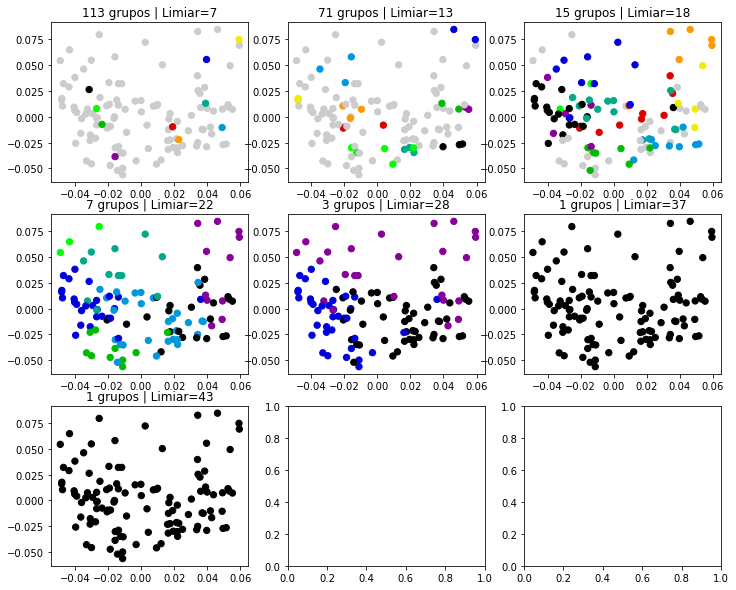

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold

from matplotlib import pyplot as plt 

X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(X_embeddings)

x = X_2d[:,0]
y = X_2d[:,1]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

set_of_colors = []
n_clusters = []
distance_thresholds = []
models = []
print('s')
distance_thresholds = [7, 13, 18, 22, 28, 37, 43]
# distance_thresholds = [1, 5, 7, 9, 10, 12, 15, ]

for i in distance_thresholds:
    print(i)
#     distance_thresholds.append(11+i)
    agglomerative = AgglomerativeClustering(linkage='ward', distance_threshold=i, n_clusters=None)

    agglomerative = agglomerative.fit(X_embeddings)
    
    models.append(agglomerative)
    
    n_clusters.append(agglomerative.n_clusters_)
    colors = []
    for l in agglomerative.labels_:
        colors.append(plt.cm.nipy_spectral(l / 10.))
    set_of_colors.append(colors)
    
ax[0][0].scatter(x, y, color=set_of_colors[0], s=40, cmap='hsv_r')
ax[0][0].title.set_text(str(n_clusters[0]) + ' grupos | Limiar=' + str(distance_thresholds[0]))

ax[0][1].scatter(x, y, color=set_of_colors[1], s=40, cmap='hsv_r')
ax[0][1].title.set_text(str(n_clusters[1]) + ' grupos | Limiar=' + str(distance_thresholds[1]))

ax[0][2].scatter(x, y, color=set_of_colors[2], s=40, cmap='hsv_r')
ax[0][2].title.set_text(str(n_clusters[2]) + ' grupos | Limiar=' + str(distance_thresholds[2]))

ax[1][0].scatter(x, y, color=set_of_colors[3], s=40, cmap='hsv_r')
ax[1][0].title.set_text(str(n_clusters[3]) + ' grupos | Limiar=' + str(distance_thresholds[3]))

ax[1][1].scatter(x, y, color=set_of_colors[4], s=40, cmap='hsv_r')
ax[1][1].title.set_text(str(n_clusters[4]) + ' grupos | Limiar=' + str(distance_thresholds[4]))

ax[1][2].scatter(x, y, color=set_of_colors[5], s=40, cmap='hsv_r')
ax[1][2].title.set_text(str(n_clusters[5]) + ' grupos | Limiar=' + str(distance_thresholds[5]))

ax[2][0].scatter(x, y, color=set_of_colors[6], s=40, cmap='hsv_r')
ax[2][0].title.set_text(str(n_clusters[6]) + ' grupos | Limiar=' + str(distance_thresholds[6]))

plt.savefig(IMG_PATH + 'clusters')
plt.show()

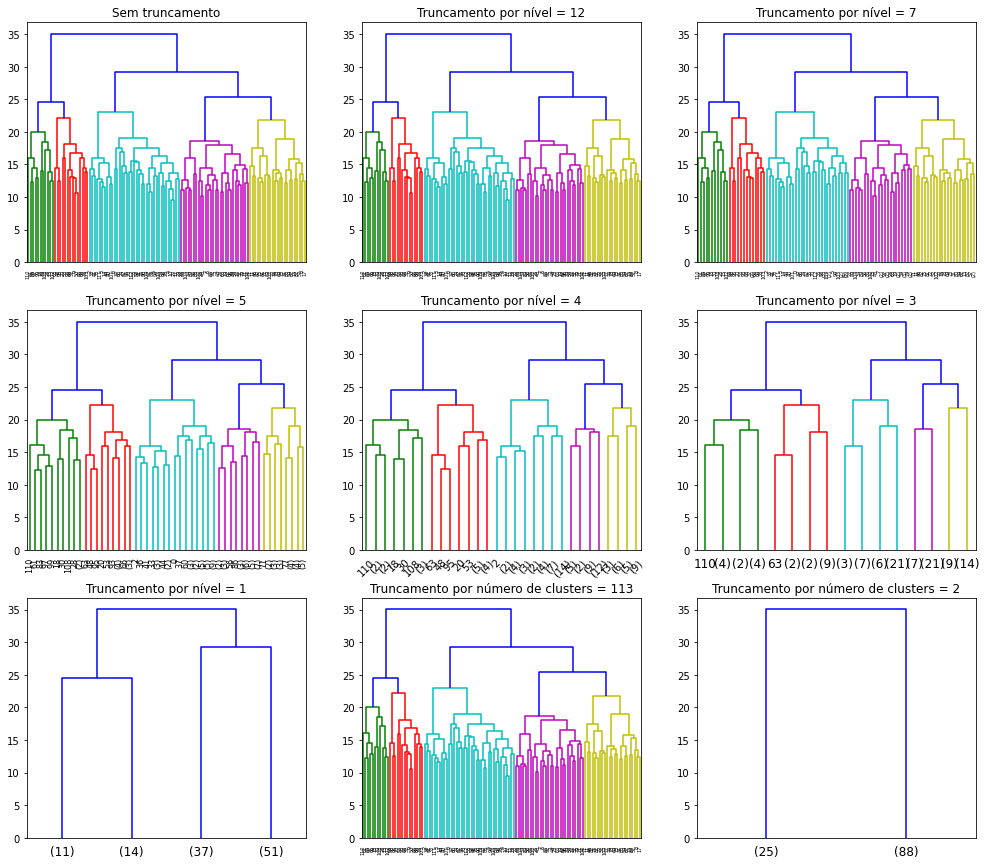

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(17, 15))

# Sem aplicar truncamento no dendograma
ax[0][0].title.set_text('Sem truncamento')
plot_dendrogram(models[0], truncate_mode=None, ax=ax[0][0])

# Truncando por nível
# Não mais do que p níveis da árvore do dendrograma são exibidos. Um “nível” inclui todos os nós com mesclagens p da última mesclagem. 
ax[0][1].title.set_text('Truncamento por nível = '+ str(12))
plot_dendrogram(models[1], truncate_mode='level', p=12, ax=ax[0][1])

ax[0][2].title.set_text('Truncamento por nível = '+ str(7))
plot_dendrogram(models[2], truncate_mode='level', p=7, ax=ax[0][2])

ax[1][0].title.set_text('Truncamento por nível = '+ str(5))
plot_dendrogram(models[3], truncate_mode='level', p=5, ax=ax[1][0])
ax[1][1].title.set_text('Truncamento por nível = '+ str(4))
plot_dendrogram(models[4], truncate_mode='level', p=4, ax=ax[1][1])
ax[1][2].title.set_text('Truncamento por nível = '+ str(3))
plot_dendrogram(models[5], truncate_mode='level', p=3, ax=ax[1][2])
ax[2][0].title.set_text('Truncamento por nível = '+ str(1))
plot_dendrogram(models[6], truncate_mode='level', p=1, ax=ax[2][0])


# Os últimos p clusters não únicos, formados na rede são os únicos nós não folha na rede; eles correspondem às linhas Z [n-p-2: fim] em Z. Todos os outros clusters não singleton são contraídos em nós folha. 
ax[2][1].title.set_text('Truncamento por número de clusters = '+ str(113))
plot_dendrogram(models[6], truncate_mode='lastp', p=113, ax=ax[2][1])
ax[2][2].title.set_text('Truncamento por número de clusters = '+ str(2))
plot_dendrogram(models[6], truncate_mode='lastp', p=2, ax=ax[2][2])

plt.savefig(IMG_PATH + 'dendograms')
# plot_dendrogram(models[2], truncate_mode='lastp', p=6, ax=ax[0][2])


[113, 71, 15, 7, 3, 1, 1]

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=7, linkage='ward',
                        memory=None, n_clusters=None)
n clusters:  113
Cluster:  0
Topics (ascending order):
exposure
legitimate
correlation
risk
unique
treat
hormonal
quantity
pain
history

Cluster:  1
Topics (ascending order):
hemorrhage
factors
intracranial
hypertension
triggering
require
subarachnoid
sensation
urgent
intervention

Cluster:  2
Topics (ascending order):
diclofnac
biofeedback
techniques
acunpultura
revealed
oxygen
effects
relaxation
therapy
pharmacological

Cluster:  3
Topics (ascending order):
exercise
exhaustive
existence
exists
explore
explored
excluded
younger
headache
aur

Cluster:  4
Topics (ascending order):
primary
ask
headaches
try
tumor
temporal
sinusitis
arteritis
bleeding
rule

Cluster:  5
Topics (ascending order):
meningoencephalitis
precipitants
extensive
researching
initial
un

ValueError: max_df corresponds to < documents than min_df

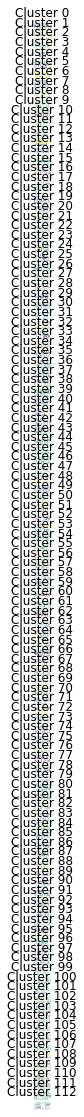

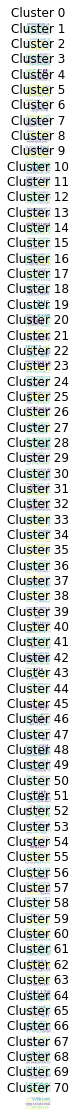

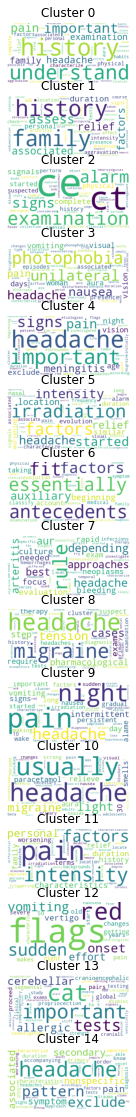

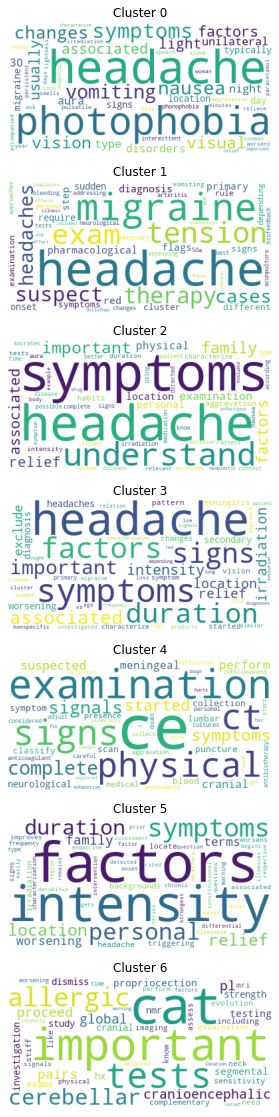

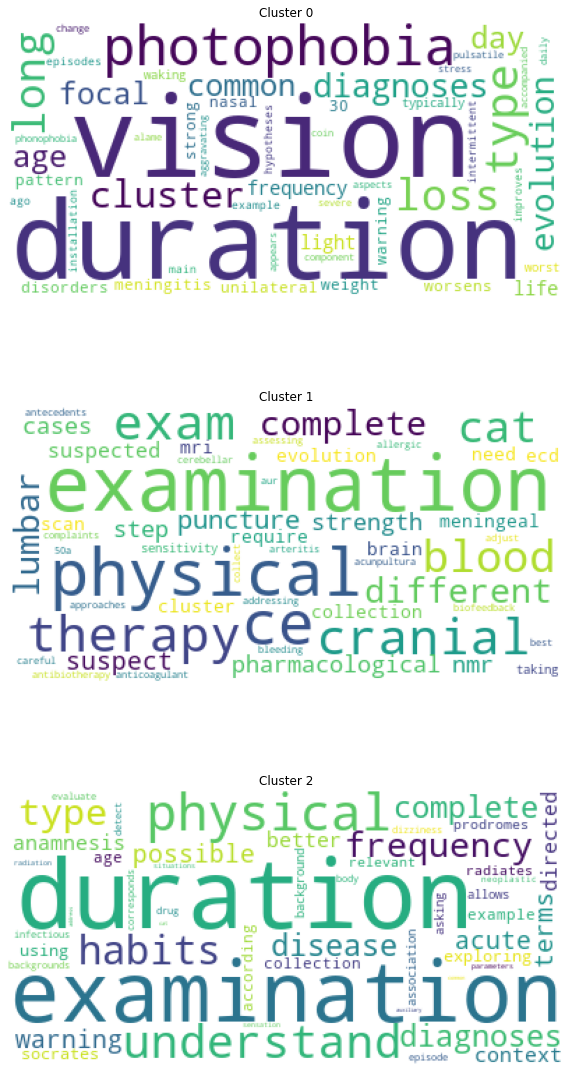

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 

# tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)

print(n_clusters)
print()

k = 0
for n in n_clusters:
    print(models[k])
    print('n clusters: ',n)

    clusters_of_sentences = [''] * n

    for i in range(len(models[k].labels_)):
        sentence = ''
        sentence = sentences_numpy[i] + ' | '
        clusters_of_sentences[models[k].labels_[i]] += sentence
    
    clusters_of_sentences_formato_tfidf = []
    for d_c in clusters_of_sentences:
        clusters_of_sentences_formato_tfidf.append(str(d_c).split('[')[1].replace('[', '').replace(']\n', '').replace('\'', ''))

    tfidf = tf_idf_vectorizer.fit_transform(clusters_of_sentences_formato_tfidf)
    feature_names = tf_idf_vectorizer.get_feature_names()

    tfidf_matrix = tfidf.toarray()

    i=0
    topics_by_cluster = []
    wordclouds = []
    for d_c in clusters_of_sentences_formato_tfidf:
#         print(d_c)
        print('Cluster: ', i)

        sorted_index_array = np.argsort(tfidf_matrix[i]) 
        highests = sorted_index_array[-10:]

        topics = []
        print('Topics (ascending order):')
        for s in highests:
            print(feature_names[s])
            topics.append(feature_names[s])

        topics_by_cluster.append(topics)

        dense = tfidf[i].todense()
        lst1 = dense.tolist()
        df = pd.DataFrame(lst1, columns=feature_names)

        wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
        wordclouds.append(wordcloud)

        print()
        i+=1
    fig, axs = plt.subplots(n, figsize=(10, 20))
        
    j=0

    for wc in wordclouds:
        axs[j].title.set_text('Cluster '+str(j))
        axs[j].imshow(wc)
        axs[j].axis("off")
        j+=1
        
#     print(topics_by_cluster)

    k+=1
    plt.savefig(IMG_PATH + 'topicos_por_'+str(n)+'_clusters')